# Problem Statement >>>To predict depature delay time of airline

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import json
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
df =pd.read_excel("Airline_delay.xlsx")
df

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Origin,Dest,Distance,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay
0,1411,1400,1527.0,1515,2578,76.0,75,59.0,12.0,ABE,CLE,339,0,NaN,NaN,NaN,NaN,NaN,11
1,1814,1740,1935.0,1859,2594,81.0,79,63.0,36.0,ABE,CLE,339,0,0.0,0.0,2.0,0.0,34.0,34
2,1407,1400,1520.0,1515,2578,73.0,75,56.0,5.0,ABE,CLE,339,0,NaN,NaN,NaN,NaN,NaN,7
3,1432,1410,1549.0,1525,2578,77.0,75,59.0,24.0,ABE,CLE,339,0,0.0,0.0,2.0,0.0,22.0,22
4,1050,1028,1213.0,1143,2085,83.0,75,67.0,30.0,ABE,CLE,339,0,0.0,0.0,8.0,0.0,22.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95035,2140,2051,2204.0,2105,5777,84.0,74,63.0,59.0,YUM,LAX,237,0,0.0,0.0,0.0,0.0,59.0,49
95036,1605,1350,1739.0,1535,3860,94.0,105,79.0,124.0,YUM,SLC,580,0,0.0,0.0,0.0,0.0,124.0,135
95037,741,725,921.0,910,3948,100.0,105,84.0,11.0,YUM,SLC,580,0,NaN,NaN,NaN,NaN,NaN,16
95038,1710,1659,1644.0,1632,5740,34.0,33,17.0,12.0,YUM,IPL,58,0,NaN,NaN,NaN,NaN,NaN,11


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95040 entries, 0 to 95039
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DepTime            95040 non-null  int64  
 1   CRSDepTime         95040 non-null  int64  
 2   ArrTime            95040 non-null  float64
 3   CRSArrTime         95040 non-null  int64  
 4   FlightNum          95040 non-null  int64  
 5   ActualElapsedTime  94745 non-null  float64
 6   CRSElapsedTime     95040 non-null  int64  
 7   AirTime            94745 non-null  float64
 8   ArrDelay           94745 non-null  float64
 9   Origin             95040 non-null  object 
 10  Dest               95040 non-null  object 
 11  Distance           95040 non-null  int64  
 12  Diverted           95040 non-null  int64  
 13  CarrierDelay       62132 non-null  float64
 14  WeatherDelay       62132 non-null  float64
 15  NASDelay           62132 non-null  float64
 16  SecurityDelay      621

In [4]:
df.isna().sum()

DepTime                  0
CRSDepTime               0
ArrTime                295
CRSArrTime               0
FlightNum                0
ActualElapsedTime      295
CRSElapsedTime           0
AirTime                295
ArrDelay               295
Origin                   0
Dest                     0
Distance                 0
Diverted                 0
CarrierDelay         32908
WeatherDelay         32908
NASDelay             32908
SecurityDelay        32908
LateAircraftDelay    32908
DepDelay                 0
dtype: int64

In [5]:
df["DepTime"].nunique()

1266

In [6]:
df["DepTime"].unique()

array([1411, 1814, 1407, ...,  213,  517,  225], dtype=int64)

<AxesSubplot:xlabel='ArrTime', ylabel='Density'>

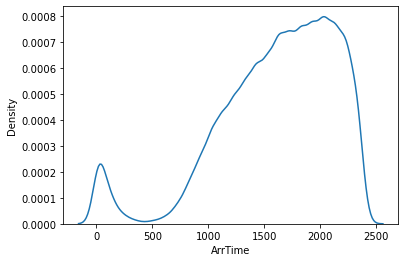

In [8]:
sns.kdeplot(df["ArrTime"])

In [9]:
df["ArrTime"]=df["ArrTime"].fillna(df["ArrTime"].mode()[0])

In [10]:
df["ArrTime"].isna().sum()

0

In [11]:
df["ActualElapsedTime"].nunique()

453

<AxesSubplot:xlabel='ActualElapsedTime', ylabel='Density'>

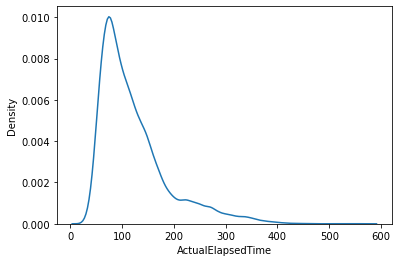

In [12]:
sns.kdeplot(df["ActualElapsedTime"])

In [14]:
df["ActualElapsedTime"]=df["ActualElapsedTime"].fillna(df["ActualElapsedTime"].median())

<AxesSubplot:xlabel='AirTime', ylabel='Density'>

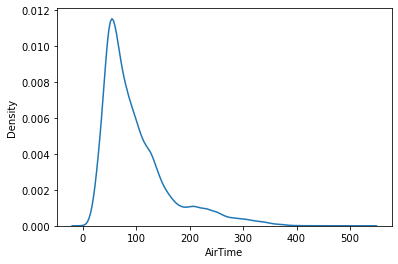

In [15]:
sns.kdeplot(df["AirTime"])

In [16]:
df["AirTime"]=df["AirTime"].fillna(df["AirTime"].median())

<AxesSubplot:xlabel='ArrDelay', ylabel='Density'>

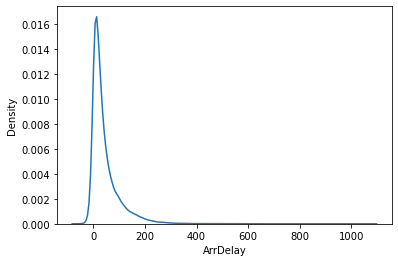

In [18]:
sns.kdeplot(df["ArrDelay"])

In [19]:
df["ArrDelay"]=df["ArrDelay"].fillna(df["ArrDelay"].median())

<AxesSubplot:xlabel='CarrierDelay', ylabel='Density'>

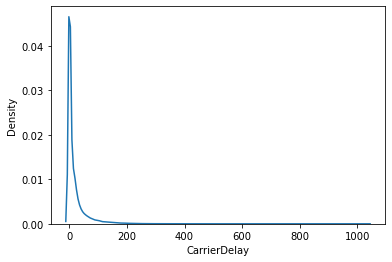

In [20]:
sns.kdeplot(df["CarrierDelay"])

In [21]:
df["CarrierDelay"]=df["CarrierDelay"].fillna(df["CarrierDelay"].median())

<AxesSubplot:xlabel='WeatherDelay', ylabel='Density'>

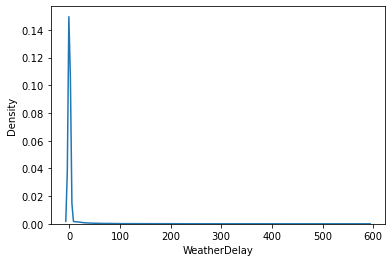

In [22]:
sns.kdeplot(df["WeatherDelay"])

In [23]:
df["WeatherDelay"]=df["WeatherDelay"].fillna(df["WeatherDelay"].mean())

<AxesSubplot:xlabel='NASDelay', ylabel='Density'>

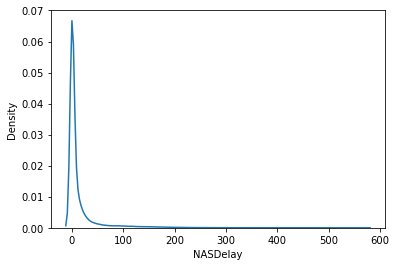

In [24]:
sns.kdeplot(df["NASDelay"])

In [25]:
df["NASDelay"]=df["NASDelay"].fillna(df["NASDelay"].median())

<AxesSubplot:xlabel='SecurityDelay', ylabel='Density'>

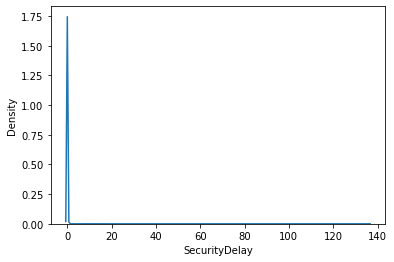

In [26]:
sns.kdeplot(df["SecurityDelay"])

In [27]:
df["SecurityDelay"]=df["SecurityDelay"].fillna(df["SecurityDelay"].mode()[0])

<AxesSubplot:xlabel='LateAircraftDelay', ylabel='Density'>

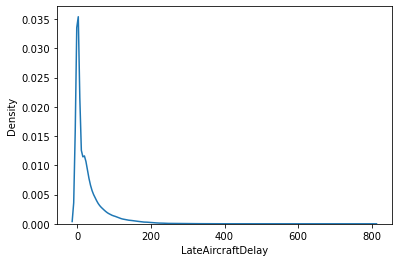

In [28]:
sns.kdeplot(df["LateAircraftDelay"])

In [29]:
df["LateAircraftDelay"]=df["LateAircraftDelay"].fillna(df["LateAircraftDelay"].median())

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95040 entries, 0 to 95039
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DepTime            95040 non-null  int64  
 1   CRSDepTime         95040 non-null  int64  
 2   ArrTime            95040 non-null  float64
 3   CRSArrTime         95040 non-null  int64  
 4   FlightNum          95040 non-null  int64  
 5   ActualElapsedTime  95040 non-null  float64
 6   CRSElapsedTime     95040 non-null  int64  
 7   AirTime            95040 non-null  float64
 8   ArrDelay           95040 non-null  float64
 9   Origin             95040 non-null  object 
 10  Dest               95040 non-null  object 
 11  Distance           95040 non-null  int64  
 12  Diverted           95040 non-null  int64  
 13  CarrierDelay       95040 non-null  float64
 14  WeatherDelay       95040 non-null  float64
 15  NASDelay           95040 non-null  float64
 16  SecurityDelay      950

In [31]:
df["Origin"].nunique()

214

In [32]:
df=pd.get_dummies(df,columns=["Origin"])

In [33]:
df=pd.get_dummies(df,columns=["Dest"])

In [34]:
df.corr().tail(1)

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Distance,...,Dest_TRI,Dest_TUL,Dest_TUS,Dest_TVC,Dest_TWF,Dest_TYS,Dest_VPS,Dest_XNA,Dest_YKM,Dest_YUM
Dest_YUM,-0.002096,0.004079,-0.005959,-0.009302,0.023051,-0.0232,-0.02445,-0.024799,0.002392,-0.024811,...,-0.000243,-0.001988,-0.002537,-0.000636,-0.000911,-0.001037,-0.000476,-0.000937,-0.000314,1.0


In [35]:
pd.options.display.max_columns = 500


In [36]:
x=df.drop("DepDelay",axis=1)
y=df["DepDelay"]

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=9)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((76032, 446), (19008, 446), (76032,), (19008,))

In [38]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [39]:
def model_eval(model,x,y):
    y_pred = model.predict(x)
    mse = mean_squared_error(y,y_pred)
    print(f"MEAN SQUARED VALUE = {mse}")
    print(f"ROOT MEAN SQUARED VALUE = {np.sqrt(mse)}")
    
    mae = mean_absolute_error(y,y_pred)
    print(f"MEAN ABSOLUTE ERROR = {mae}")
    
    r2 = r2_score(y,y_pred)
    print(f"R-SQUARED VALUE of training = {r2}")
    
    n = x.shape[0]
    p = x.shape[1]
    adj_r2 = 1 - (((1-r2)* (n-1)) / (n-p-1))
    print(f"ADJUSTED R - SQUARED VALUE = {adj_r2}")
    
    return "Success"
model_eval(model,x_train,y_train)

MEAN SQUARED VALUE = 32.698133536428195
ROOT MEAN SQUARED VALUE = 5.718228181563603
MEAN ABSOLUTE ERROR = 1.7627653903398437
R-SQUARED VALUE of training = 0.9869957834970625
ADJUSTED R - SQUARED VALUE = 0.9869190502753874


'Success'

In [45]:
def model_eval(model,x,y):
    y_pred = model.predict(x)
    mse = mean_squared_error(y,y_pred)
    print(f"MEAN SQUARED VALUE = {mse}")
    print(f"ROOT MEAN SQUARED VALUE = {np.sqrt(mse)}")
    
    mae = mean_absolute_error(y,y_pred)
    print(f"MEAN ABSOLUTE ERROR = {mae}")
    
    r2 = r2_score(y,y_pred)
    print(f"R-SQUARED VALUE of testing = {r2}")
    
    n = x.shape[0]
    p = x.shape[1]
    adj_r2 = 1 - (((1-r2)* (n-1)) / (n-p-1))
    print(f"ADJUSTED R - SQUARED VALUE = {adj_r2}")
    
    return "Success"
model_eval(model,x_test,y_test)

MEAN SQUARED VALUE = 41.918612475625885
ROOT MEAN SQUARED VALUE = 6.474458469681143
MEAN ABSOLUTE ERROR = 1.7859123252890376
R-SQUARED VALUE of testing = 0.9840890958805579
ADJUSTED R - SQUARED VALUE = 0.9837067747105094


'Success'

In [40]:
with open('airline_dep_delay_model.pkl','wb') as file: 
    pickle.dump(model,file)

In [41]:
data = x.tail(1)
data.shape

(1, 446)

In [42]:
result = model.predict(data)
result

array([20.32059452])

In [43]:
df.tail(1)

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Distance,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,Origin_ABE,Origin_ABQ,Origin_ACV,Origin_AEX,Origin_ALB,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BFL,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BLI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BRO,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CEC,Origin_CHA,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELP,Origin_EUG,Origin_EWR,Origin_FAR,Origin_FAT,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FSD,Origin_FWA,Origin_GEG,Origin_GJT,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GTF,Origin_GUC,Origin_HDN,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_IPL,Origin_ISP,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_KOA,Origin_LAN,Origin_LAS,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LNK,Origin_LRD,Origin_LWS,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIT,Origin_PMD,Origin_PNS,Origin_PSC,Origin_PSP,Origin_PVD,Origin_PWM,Origin_RAP,Origin_RDD,Origin_RDM,Origin_RDU,Origin_RFD,Origin_RIC,Origin_RNO,Origin_ROA,Origin_ROC,Origin_RSW,Origin_SAN,Origin_SAT,Origin_SAV,Origin_SBA,Origin_SBN,Origin_SBP,Origin_SDF,Origin_SEA,Origin_SFO,Origin_SGF,Origin_SGU,Origin_SHV,Origin_SJC,Origin_SJU,Origin_SLC,Origin_SLE,Origin_SMF,Origin_SMX,Origin_SNA,Origin_SPI,Origin_SRQ,Origin_STL,Origin_STT,Origin_STX,Origin_SUN,Origin_SYR,Origin_TEX,Origin_TLH,Origin_TPA,Origin_TRI,Origin_TUL,Origin_TUS,Origin_TVC,Origin_TWF,Origin_TYS,Origin_VPS,Origin_XNA,Origin_YKM,Origin_YUM,Dest_ABE,Dest_ABQ,Dest_ACV,Dest_AEX,Dest_ALB,Dest_AMA,Dest_ANC,Dest_ASE,Dest_ATL,Dest_ATW,Dest_AUS,Dest_AVL,Dest_AVP,Dest_AZO,Dest_BDL,Dest_BFL,Dest_BGR,Dest_BHM,Dest_BIL,Dest_BIS,Dest_BLI,Dest_BMI,Dest_BNA,Dest_BOI,Dest_BOS,Dest_BPT,Dest_BRO,Dest_BTM,Dest_BTR,Dest_BTV,Dest_BUF,Dest_BUR,Dest_BWI,Dest_BZN,Dest_CAE,Dest_CAK,Dest_CDC,Dest_CEC,Dest_CHA,Dest_CHS,Dest_CIC,Dest_CID,Dest_CLD,Dest_CLE,Dest_CLL,Dest_CLT,Dest_CMH,Dest_COD,Dest_COS,Dest_CPR,Dest_CRP,Dest_CRW,Dest_CVG,Dest_CWA,Dest_DAL,Dest_DAY,Dest_DCA,Dest_DEN,Dest_DFW,Dest_DRO,Dest_DSM,Dest_DTW,Dest_EGE,Dest_EKO,Dest_ELP,Dest_EUG,Dest_EWR,Dest_FAR,Dest_FAT,Dest_FCA,Dest_FLG,Dest_FLL,Dest_FSD,Dest_FWA,Dest_GEG,Dest_GJT,Dest_GPT,Dest_GRB,Dest_GRK,Dest_GRR,Dest_GSO,Dest_GSP,Dest_GTF,Dest_GUC,Dest_HDN,Dest_HLN,Dest_HNL,Dest_HOU,Dest_HPN,Dest_HRL,Dest_HSV,Dest_IAD,Dest_IAH,Dest_ICT,Dest_IDA,Dest_ILM,Dest_IND,Dest_IPL,Dest_ISP,Dest_ITO,Dest_IYK,Dest_JAC,Dest_JAN,Dest_JAX,Dest_JFK,Dest_KOA,Dest_LAN,Dest_LAS,Dest_LAX,Dest_LBB,Dest_LCH,Dest_LEX,Dest_LFT,Dest_LGA,Dest_LGB,Dest_LIH,Dest_LIT,Dest_LNK,Dest_LRD,Dest_LWS,Dest_MAF,Dest_MBS,Dest_MCI,Dest_MCO,Dest_MDT,Dest_MDW,Dest_MEM,Dest_MFE,Dest_MFR,Dest_MGM,Dest_MHT,Dest_MIA,Dest_MKE,Dest_MLB,Dest_MLI,Dest_MLU,Dest_MOB,Dest_MOD,Dest_MRY,Dest_MSN,Dest_MSO,Dest_MSP,Dest_MSY,Dest_MTJ,Dest_MYR,Dest_OAK,Dest_OGD,Dest_OGG,Dest_OKC,Dest_OMA,Dest_ONT,Dest_ORD,Dest_ORF,Dest_OXR,Dest_PBI,Dest_PDX,Dest_PHL,Dest_PHX,Dest_PIA,Dest_PIH,Dest_PIT,Dest

# User test function

In [44]:
columns = {"Column Names":x.columns.tolist()}

with open('columns_names.json','w') as file: 
    json.dump(columns,file)

In [45]:
pd.options.display.max_columns = 70

In [46]:
df.tail(1)

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Distance,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,Origin_ABE,Origin_ABQ,Origin_ACV,Origin_AEX,Origin_ALB,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BFL,Origin_BGR,Origin_BHM,...,Dest_SBN,Dest_SBP,Dest_SDF,Dest_SEA,Dest_SFO,Dest_SGF,Dest_SGU,Dest_SHV,Dest_SJC,Dest_SJU,Dest_SLC,Dest_SLE,Dest_SMF,Dest_SMX,Dest_SNA,Dest_SPI,Dest_SRQ,Dest_STL,Dest_STT,Dest_STX,Dest_SUN,Dest_SYR,Dest_TEX,Dest_TLH,Dest_TPA,Dest_TRI,Dest_TUL,Dest_TUS,Dest_TVC,Dest_TWF,Dest_TYS,Dest_VPS,Dest_XNA,Dest_YKM,Dest_YUM
95039,740,720,926.0,905,3948,106.0,105,93.0,21.0,580,0,0.0,0.0,0.0,21.0,0.0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
with open('airline_dep_delay_model.pkl','rb') as model_file: 
    model = pickle.load(model_file)
    
with open('columns_names.json','r') as col_file: 
    column_names = json.load(col_file)   

user_input = np.zeros(len(column_names['Column Names']))

array = np.array(column_names['Column Names'])

DepTime =740             
CRSDepTime =720            
ArrTime =926.0                
CRSArrTime =905            
FlightNum =3948              
ActualElapsedTime =106      
CRSElapsedTime =105      
AirTime=93               
ArrDelay =21 
Origin ='ABE'
Dest='ABE'
Distance =580              
Diverted =0               
CarrierDelay  =0          
WeatherDelay =0           
NASDelay =21               
SecurityDelay=0         
LateAircraftDelay=20 

user_input[0] = DepTime
user_input[1] =CRSDepTime
user_input[2] =ArrTime
user_input[3] =CRSArrTime
user_input[4] =FlightNum
user_input[5] =ActualElapsedTime
user_input[6] =CRSElapsedTime
user_input[7] =AirTime
user_input[8] =ArrDelay

Origin_string = 'Origin_'+Origin
Origin_index = np.where(array == Origin_string)[0][0]
user_input[Origin_index] = 1 

dest_string = 'Dest_'+Dest
dest_index = np.where(array == dest_string)[0][0]
user_input[dest_index] = 1

user_input[9] =Distance
user_input[10] =Diverted
user_input[11] =CarrierDelay
user_input[12] =WeatherDelay
user_input[13] =NASDelay
user_input[14] =SecurityDelay
user_input[15] =LateAircraftDelay


print(f"{user_input=}")
print(len(user_input))

dep_delay = model.predict([user_input])
print(f"Predicted depature delay = {dep_delay}")
print(f"Actual depature delay = 20")

user_input=array([7.400e+02, 7.200e+02, 9.260e+02, 9.050e+02, 3.948e+03, 1.060e+02,
       1.050e+02, 9.300e+01, 2.100e+01, 5.800e+02, 0.000e+00, 0.000e+00,
       0.000e+00, 2.100e+01, 0.000e+00, 2.000e+01, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
